# Homework 12

This homework use a dataset containing information about diamonds from [Kaggle](https://www.kaggle.com/shivam2503/diamonds) and can be downloaded directly [here](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diamonds.csv).  

The columns in the dataset are:
* carat = weight of diamond
* cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color =  diamond colour, from J (worst) to D (best)
* clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth = total depth percentage
* table = width of top of diamond relative to widest point
* price = price in US dollars
* x = length in mm
* y = width in mm
* z = depth in mm

### Question 1: Load and clean the data

When loading the data, use the parameter `index_col = 0` in `read_csv()` to tell Pandas that the first column is the index (name of the rows).

Turn the cut, color, and clarity columns into dummy variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diamonds.csv", index_col=0)

In [5]:
diamonds = pd.get_dummies(diamonds, columns = ["cut", "color", "clarity"], drop_first = True)

In [6]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Question 2: Prepare the data for scikit-learn

In this lab, we will try to predict the price of the diamonds using data in all the other columns (the features or independent variables).

a) Create a variable for all the features/independent variables (all columns except price) and a variable for the dependent variable (the price column).

In [11]:
x = diamonds.drop(columns=["price"])
y = diamonds[['price']]

2b)  Split the data into training (80%) and testing (20%) datasets.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Question 3:  Fit and evaluate a decision tree

a) Train a decision tree with maximum depth 3 on your training data.

In [15]:
dt_model = DecisionTreeRegressor(max_depth = 3)
dt_model = dt_model.fit(x_train, y_train)

3b) Use your decision tree from part (a) to predict the prices on both the training and testing data.

In [18]:
y_pred_test = dt_model.predict(x_test)
y_pred_train = dt_model.predict(x_train)

3c) What is the mean squared error of the predictions on the training data and on the testing data?  From these mean squared errors, what can you say about how well the model fits the data?

In [19]:
mse_test = mean_squared_error(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)

In [20]:
print(f"TEST MSE:\t{mse_test}\nTRAIN MSE:\t{mse_train}")

TEST MSE:	1966018.6815044351
TRAIN MSE:	2018755.7388893983


### Question 4: Decision tree

Create an image of your decision tree and include it in your zip file, if it does not appear in your notebook.  Which features are used to predict the price in your decision tree?

**Hint for Jupyter Hub on Lehman360 and webgraphviz.com:**  Display the tree first to see which column numbers it uses, and only convert those columns to the actual column names.   Also, you can get an image of the tree by zooming out on webgraphviz and then taking a screenshot.

[Text(581.25, 990.9375, 'X[0] <= 0.995\nmse = 15884723.977\nsamples = 43152\nvalue = 3923.782'),
 Text(290.625, 707.8125, 'X[4] <= 5.525\nmse = 1245902.66\nsamples = 27938\nvalue = 1632.287'),
 Text(145.3125, 424.6875, 'X[4] <= 4.995\nmse = 269095.996\nsamples = 19935\nvalue = 1054.219'),
 Text(72.65625, 141.5625, 'mse = 57703.76\nsamples = 14121\nvalue = 789.742'),
 Text(217.96875, 141.5625, 'mse = 200004.932\nsamples = 5814\nvalue = 1696.581'),
 Text(435.9375, 424.6875, 'X[0] <= 0.865\nmse = 773285.822\nsamples = 8003\nvalue = 3072.22'),
 Text(363.28125, 141.5625, 'mse = 403517.17\nsamples = 5731\nvalue = 2730.544'),
 Text(508.59375, 141.5625, 'mse = 668728.07\nsamples = 2272\nvalue = 3934.08'),
 Text(871.875, 707.8125, 'X[4] <= 7.195\nmse = 15417128.168\nsamples = 15214\nvalue = 8131.736'),
 Text(726.5625, 424.6875, 'X[18] <= 0.5\nmse = 4776188.271\nsamples = 10304\nvalue = 6132.221'),
 Text(653.90625, 141.5625, 'mse = 5089762.553\nsamples = 7596\nvalue = 6660.303'),
 Text(799.21875

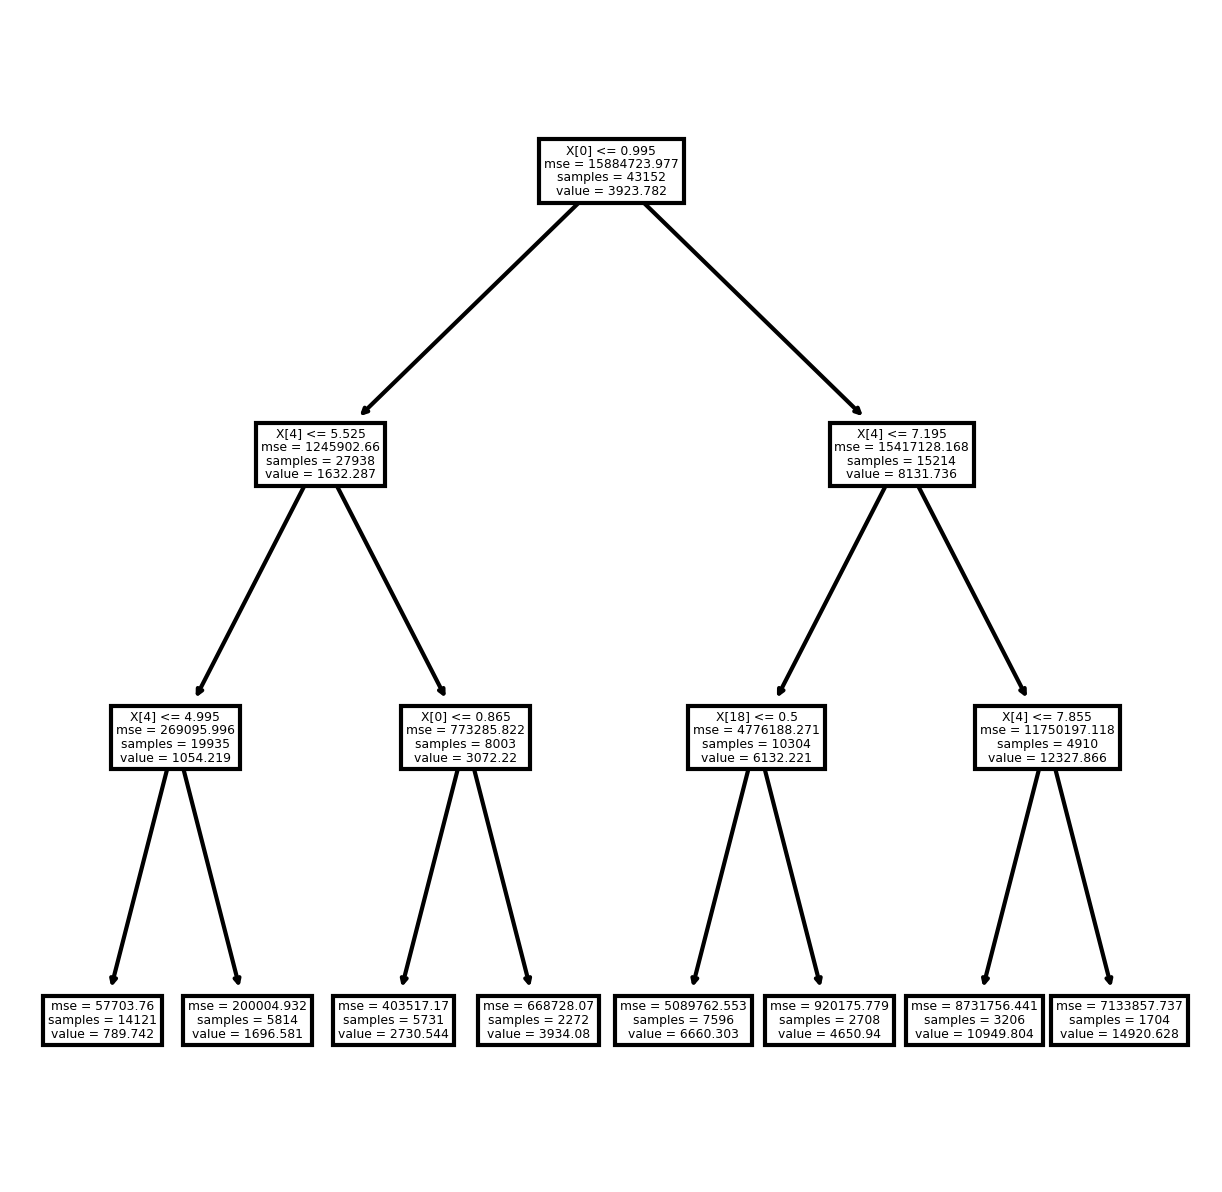

In [22]:
from sklearn.tree import plot_tree
# following line of code can be used to adjust the figsize to make it readable
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(dt_model)

### Question 5:   Best model

Try at least 2 other maximum depth values, computing the mean squared error for the training and testing data.  State which values you tried, which model was best, and why.

### Bonus Question

Fit a linear regression model to the training data, and compute the mean squared error on the training and testing data.  How does this linear regression model compare to your best decision tree?